In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

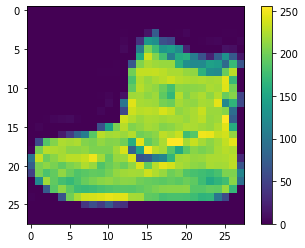

In [8]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show

In [9]:
train_images /= 255.0
test_images /= 255.0

ValueError: output array is read-only

In [10]:
train_images = train_images / 255.0
test_images = test_images / 255.0

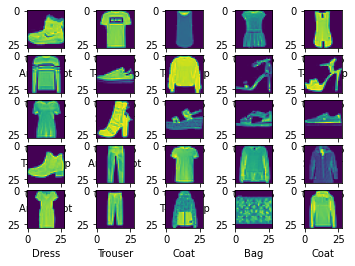

In [11]:
plt.figure()
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

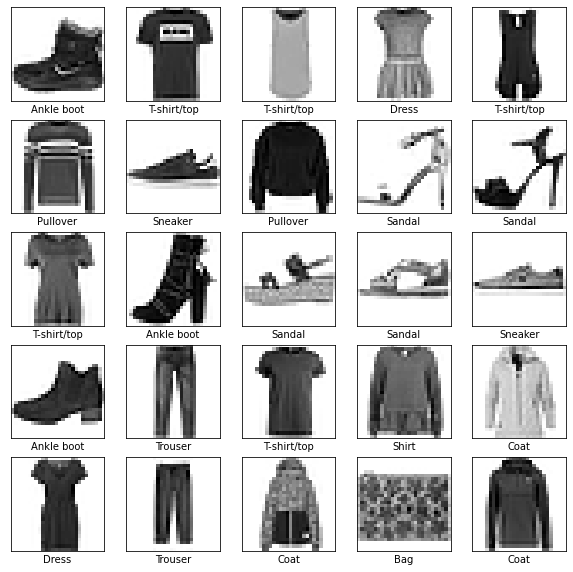

In [14]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [56]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')
])

In [57]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4969 - accuracy: 0.8253
Epoch 2/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3761 - accuracy: 0.8644
Epoch 3/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3372 - accuracy: 0.8769
Epoch 4/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3099 - accuracy: 0.8863
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2943 - accuracy: 0.8914


In [59]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3560 - accuracy: 0.8709


In [60]:
print('loss: ', test_loss)
print('정확도: ', test_acc)

loss:  0.35600115965604784
정확도:  0.8709


In [61]:
predictions = model.predict(test_images)

In [62]:
predictions[0]

array([3.1145071e-04, 7.9453109e-08, 1.6085864e-06, 9.9572102e-09,
       1.4142350e-06, 3.2959249e-02, 2.3502820e-05, 3.3936966e-02,
       8.8271254e-06, 9.3275684e-01], dtype=float32)

In [63]:
np.argmax(predictions[0])

9

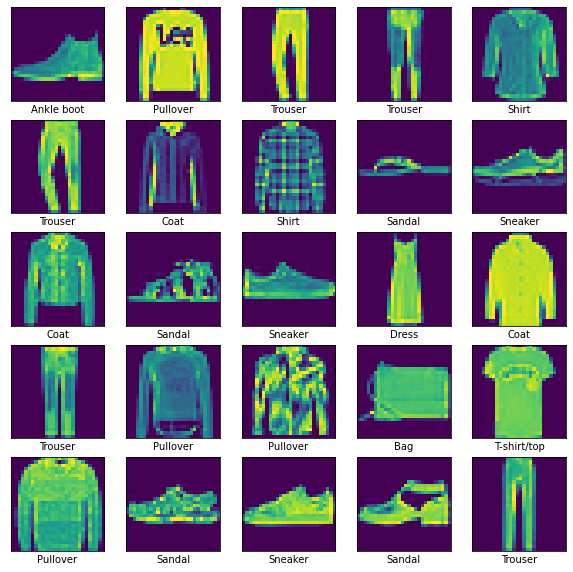

In [64]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], )
    plt.xlabel(class_names[np.argmax(predictions[i])])
plt.show()

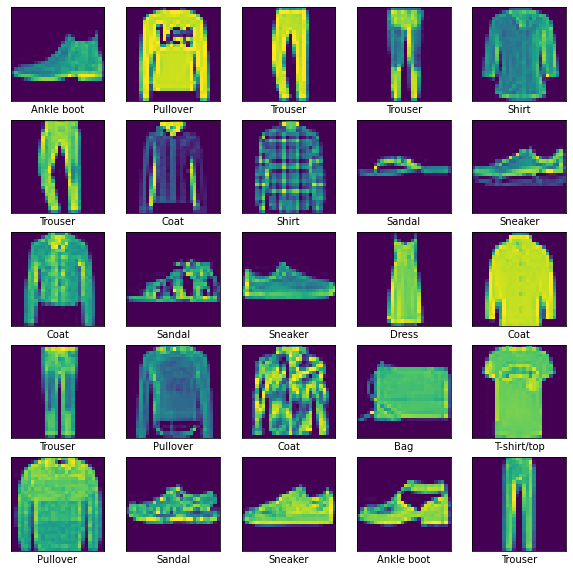

In [65]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], )
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [66]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

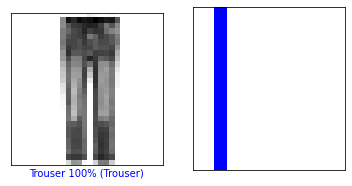

In [70]:
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

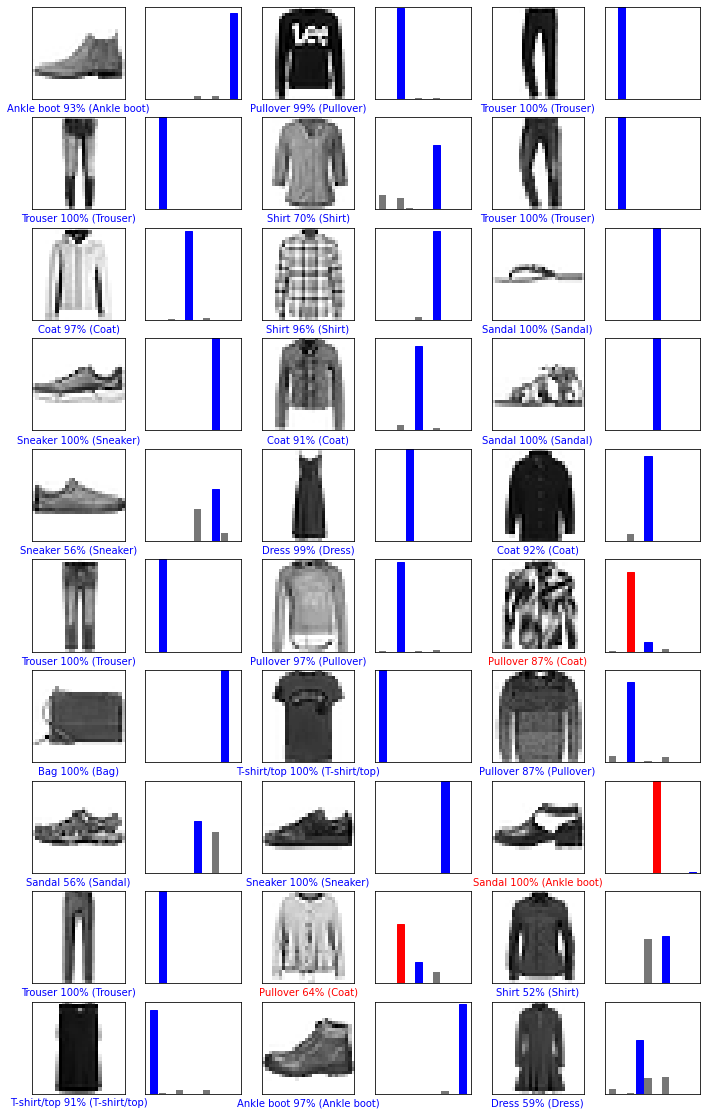

In [74]:
num_rows = 10
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [84]:
img = test_images[0]

In [85]:
img = np.expand_dims(img, 0)

In [86]:
print(img.shape)

(1, 28, 28)


In [87]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.1145071e-04 7.9453109e-08 1.6085879e-06 9.9571915e-09 1.4142350e-06
  3.2959279e-02 2.3502820e-05 3.3936959e-02 8.8271336e-06 9.3275684e-01]]


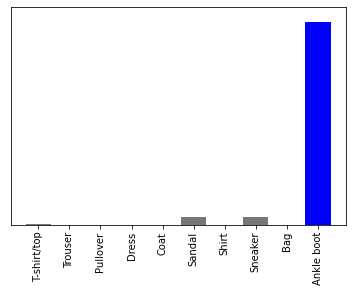

In [89]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=90)

In [90]:
np.argmax(predictions_single[0])

9